<a href="https://colab.research.google.com/github/BrokenShell/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [x] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [x] Make at least 1 partial dependence plot to explain your model.
- [x] Make at least 1 Shapley force plot to explain an individual prediction.
- [x] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [x] Make multiple PDPs with 1 feature in isolation.
- [x] Make multiple PDPs with 2 features in interaction. 
- [x] Use Plotly to make a 3D PDP.
- [x] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [x] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [x] Use Shapley values to display verbal explanations of individual predictions.
- [x] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

## Installers

In [ ]:
!pip install category_encoders
!pip install eli5
!pip install pdpbox
!pip install shap
!pip install Fortuna

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 112kB 3.4MB/s 
     |████████████████████████████████| 57.7MB 72kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=fbf96afc23889968a947edefcdfd9e4b97f7b1a28891658a7d57ba9d6e7c38ce
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 276kB 3.3MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=28e61c572c430bd787488093781c891f2e02bb4960b8b460c7bbbb30a0a36b70
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap
     |████████████████████████████████| 194kB 3.4MB/s 
  Created wheel for Fortuna: filename=Fortuna-3.17.8-cp36-cp36m-linux_x86_64.whl size=528731 sha256=e67736e9ba825ae2f558715c992a8ada349894db709cf102

## Imports

In [ ]:
import pandas as pd
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from pdpbox.pdp import pdp_plot, pdp_isolate, pdp_interact, pdp_interact_plot
import shap
from category_encoders import OrdinalEncoder
import Fortuna

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


## Helper Functions

In [ ]:
def format_score(score):
    print(f"Accuracy Score: {100*score:.2f}%")

In [ ]:
def cr_encode(cr):
    cr_lookup = {
        '1/16': -3,
        '1/8':  -2,
        '1/4':  -1,
        '1/2':   0,
    }
    return cr_lookup[cr] if cr in cr_lookup.keys() else int(cr)

# Data Source

In [ ]:
all_monsters = pd.read_csv("https://sharpdesigndigital.com/monster_data.csv")
all_monsters = all_monsters[all_monsters['Rank'] == 'Monster'].drop(columns=['Rank'])
all_monsters['CR'] = all_monsters['CR'].apply(cr_encode)
num_monsters = len(all_monsters)
unique_monsters = len(all_monsters['Name'].value_counts())
print(f"Total number of monsters: {num_monsters}")
print(f"Number of unique monster names: {unique_monsters}")

Total number of monsters: 46757
Number of unique monster names: 59


In [ ]:
all_monsters.head()

,Name,Tier,CR,HP,AC,ATT,DC,DAM,XP
1,Chimera,2,6,149,15,6,15,41,2300
2,Hook Horror,1,2,94,12,3,13,16,450
3,Gelatinous Sphere,1,4,125,14,5,14,27,1100
4,Displacer Beast,3,11,229,17,8,17,72,7200
5,Ghoul,2,10,215,18,6,17,68,5900


In [ ]:
partition = len(all_monsters) // 2
training, testing = all_monsters[:partition], all_monsters[partition:]

# Random Forest Regressor

In [ ]:
target = 'CR'
features = ['HP', 'AC', 'ATT', 'DC', 'DAM']

train_monsters = training.sample(6000, random_state=42)
test_monsters = testing.sample(10000, random_state=42)

X_test, y_test = test_monsters[features], test_monsters[target]
X_train, X_val, y_train, y_val = train_test_split(
    train_monsters[features].copy(), 
    train_monsters[target].copy(), 
    stratify=train_monsters[target],
    random_state=42,
    test_size=1/6,
)

pipeline = make_pipeline(
    # OrdinalEncoder(),
    StandardScaler(),
    RandomForestRegressor(
        random_state=42,
    ),
).fit(X_train, y_train)
format_score(pipeline.score(X_val, y_val))

Accuracy Score: 99.99%


# Single Feature PDP for each Feature

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


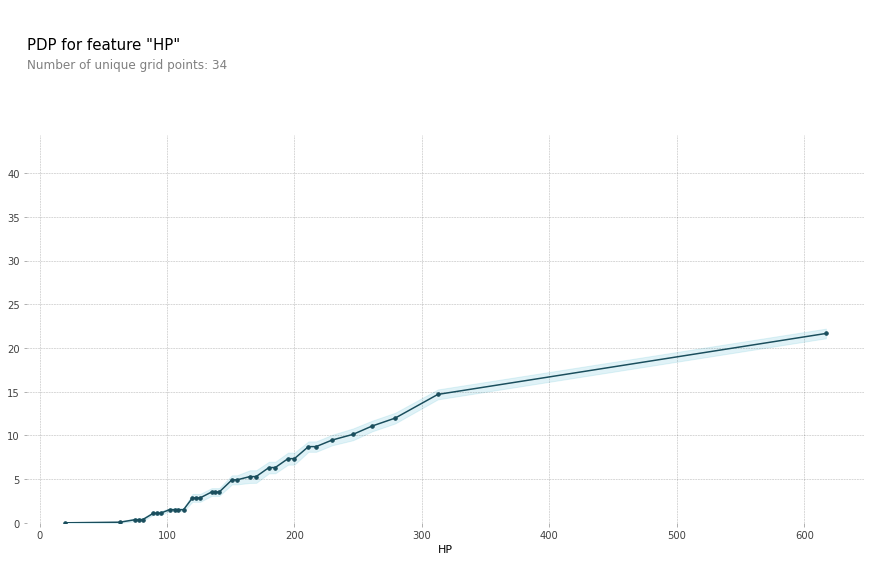

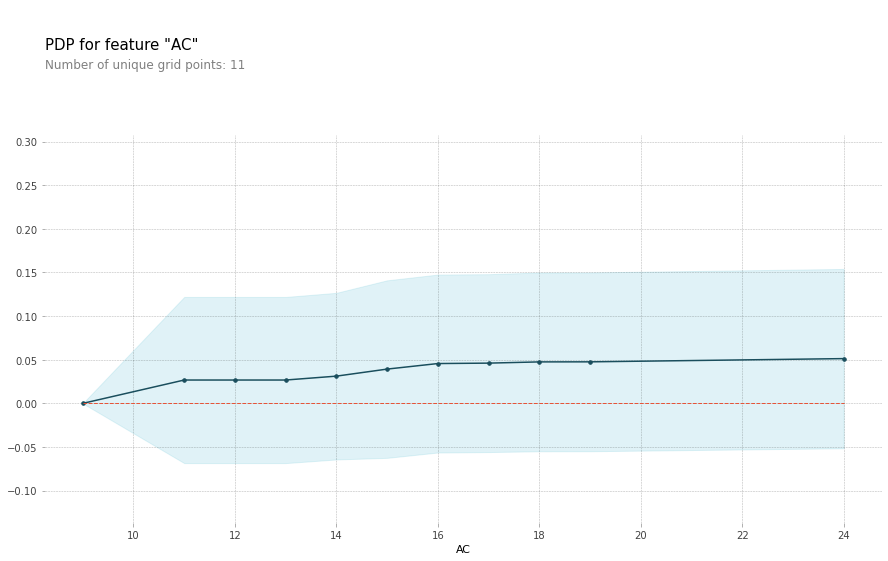

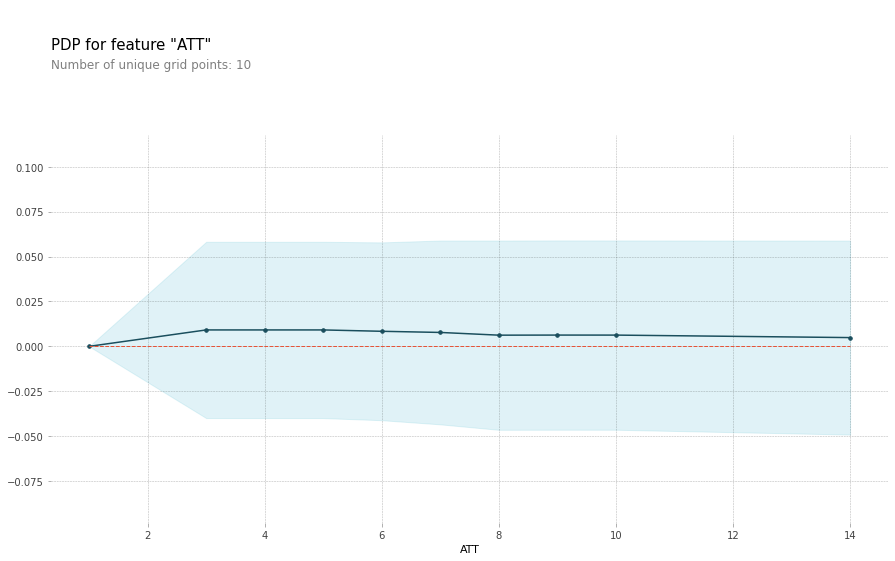

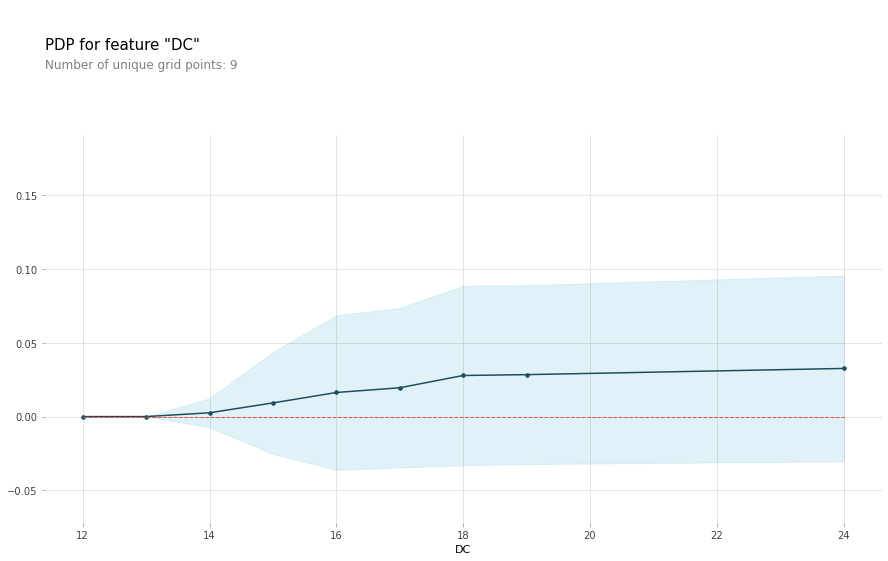

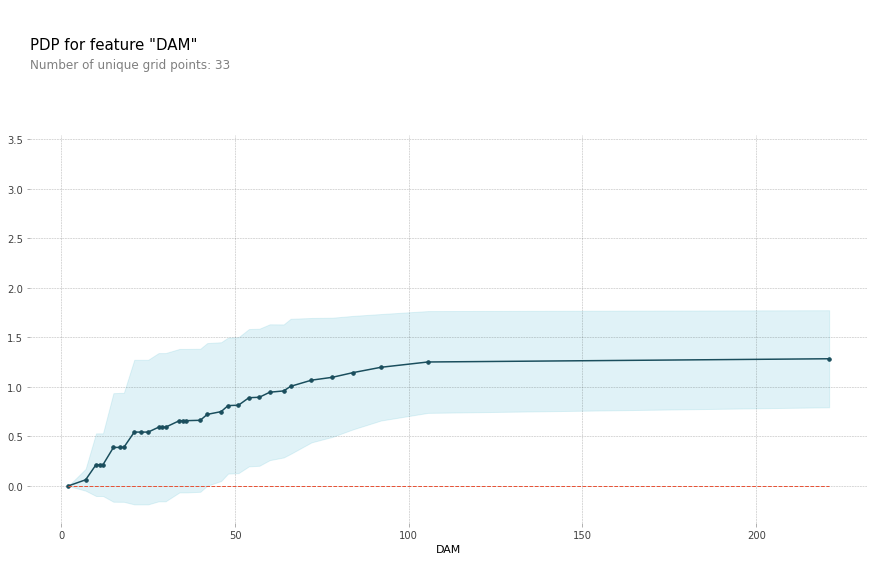

In [ ]:
for feature in features:
    isolated = pdp_isolate(
        model = pipeline,
        dataset=X_train,
        model_features=features,
        feature=feature,
        num_grid_points=34,
    )
    pdp_plot(isolated, feature_name=feature);

In [ ]:
features = ['AC', 'ATT']
interaction = pdp_interact(
    model = pipeline,
    dataset=X_train,
    model_features=X_train.columns,
    features=features,
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


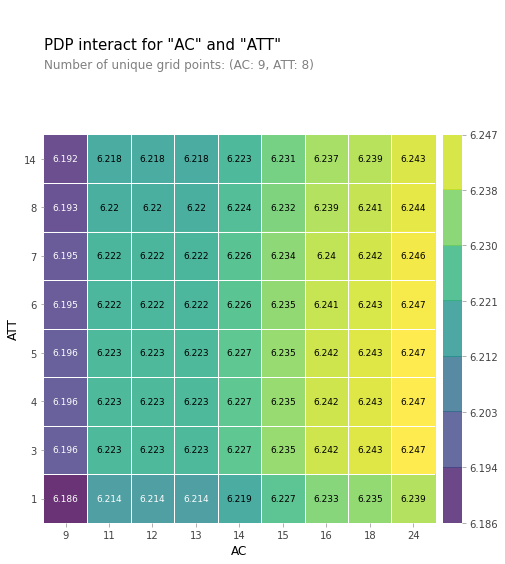

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

## 3D Plot

In [ ]:
import plotly.graph_objs as go

pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1],
)[::-1]  # Reversed Y

surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values,
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]),
        yaxis=dict(title=features[1]),
        zaxis=dict(title=target),
    )
)

fig = go.Figure(surface, layout)
fig.show()

## Fresh Data

In [ ]:
target = 'CR'
features = ['AC', 'ATT']

few_monsters = training.sample(6000, random_state=42)
test_monsters = testing.sample(10000, random_state=42)

X_test, y_test = test_monsters[features], test_monsters[target]
X_train, X_val, y_train, y_val = train_test_split(
    train_monsters[features].copy(), 
    train_monsters[target].copy(), 
    stratify=train_monsters[target],
    random_state=42,
    test_size=1/6,
)

model = RandomForestRegressor(
    n_estimators=255,
    criterion='mse',
    n_jobs=-1,
    random_state=42,
).fit(X_train, y_train)
print("Validation", end=' ')
format_score(model.score(X_val, y_val))

Validation Accuracy Score: 99.13%


In [ ]:
print("Test", end=' ')
format_score(model.score(X_test, y_test))

Test Accuracy Score: 99.09%


## Shapley Values

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
row = 0

shap.initjs()
print(f"Actual CR: {y_test.iloc[[row]].values[0]}")
print(f"Model Prediction: {model.predict(X_test.iloc[[row]])[0]:.2f}\n")
shap_values = explainer.shap_values(X_test.iloc[[row]])
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_test.iloc[[row]],
)

Actual CR: 4
Model Prediction: 4.30



In [ ]:
row = 1

shap.initjs()
print(f"Actual CR: {y_test.iloc[[row]].values[0]}")
print(f"Model Prediction: {model.predict(X_test.iloc[[row]])[0]:.2f}\n")
shap_values = explainer.shap_values(X_test.iloc[[row]])
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_test.iloc[[row]],
)

Actual CR: 8
Model Prediction: 8.51



In [ ]:
row = 2

shap.initjs()
print(f"Actual CR: {y_test.iloc[[row]].values[0]}")
print(f"Model Prediction: {model.predict(X_test.iloc[[row]])[0]:.2f}\n")
shap_values = explainer.shap_values(X_test.iloc[[row]])
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_test.iloc[[row]],
)

Actual CR: 6
Model Prediction: 6.54



In [ ]:
row = 3

shap.initjs()
print(f"Actual CR: {y_test.iloc[[row]].values[0]}")
print(f"Model Prediction: {model.predict(X_test.iloc[[row]])[0]:.2f}\n")
shap_values = explainer.shap_values(X_test.iloc[[row]])
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_test.iloc[[row]],
)

Actual CR: 2
Model Prediction: 2.00



In [ ]:
row = Fortuna.random_int(10, 10000)

shap.initjs()
print(f"Actual CR: {y_test.iloc[[row]].values[0]}")
print(f"Model Prediction: {model.predict(X_test.iloc[[row]])[0]:.2f}\n")
shap_values = explainer.shap_values(X_test.iloc[[row]])
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_test.iloc[[row]],
)

Actual CR: 12
Model Prediction: 11.47

